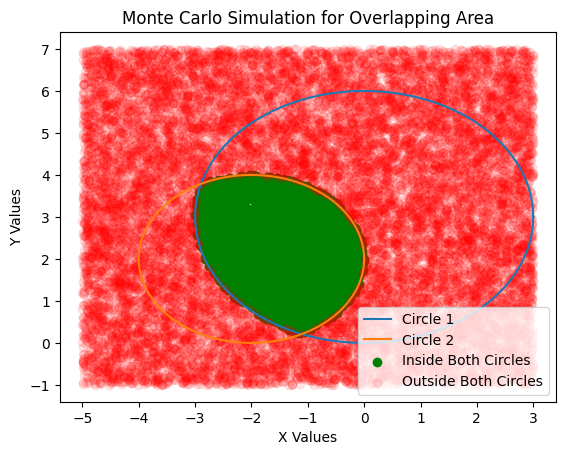

Estimated overlapping area: 8.336
Estimated error of the overlapping area: 0.15231794116255643


In [26]:
import random
import matplotlib.pyplot as plt

%pip install matplotlib


# Ο αριθμός των τυχαίων σημείων
num_points = 2*(10**4)

# Κύκλοι
def circle1(x, y):
    return x**2 + (y - 3)**2 <= 3**2

def circle2(x, y):
    return (x + 2)**2 + (y - 2)**2 <= 2**2

# Το πλαίσιου που θα εφαρμόσουμε τη μέθοδο.
# Βάζω κάποια περιθώρια για να πιάνει όλο το σχήμα.
#Αλλιώς θα μπορούσα να επιλέξω (-3,0),(0,4).

x_min, x_max = -5, 3
y_min, y_max = -1, 7

# Η λίστα με τα σημεία εντός και εκτός του εμβαδού τομής.

points_inside = []
points_outside = []

# ;Aθροιση σημείων εντός (το p).
count_inside_both = 0

# Παραγωγή των τυχαίων σημείων και ταξινόμηση σε εντός και εκτός εμβαδού.
# Αυτό το κάνω για να το ζωγραφίσω, διαφορετικά δε χρειάζεται.
# Ταυτόχρονα αθροίζω και το p.

for _ in range(num_points):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)

    if circle1(x, y) and circle2(x, y):
        points_inside.append((x, y))
        count_inside_both += 1

    else:
        points_outside.append((x, y))


# Πλοτάρω τους κύκλους.
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(3 * np.cos(theta), 3 * np.sin(theta) + 3, label='Circle 1')
plt.plot(2 * np.cos(theta) - 2, 2 * np.sin(theta) + 2, label='Circle 2')

# Βάζω στο πάνω πλοτ και τα σημεία εντός/εκτός εμβαδού με διαφορετικά χρώματα.
points_inside = np.array(points_inside)
points_outside = np.array(points_outside)
plt.scatter(points_inside[:, 0], points_inside[:, 1], color='green', label='Inside Both Circles')
plt.scatter(points_outside[:, 0], points_outside[:, 1], color='red', label='Outside Both Circles', alpha=0.1)

# Τίτλοι κλπ labels.
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Monte Carlo Simulation for Overlapping Area')
plt.legend()

# Πλοτάρισμα.
plt.show()

#Τώρα που το πλόταρα μπορώ να κάνω και τους υπολογίσμους και για καλύτερο πλαίσιο.

# Υπολογισμός περιοχής
bounding_box_area = (x_max - x_min) * (y_max - y_min)
overlapping_area = (count_inside_both / num_points) * bounding_box_area
p=(count_inside_both / num_points)

#Σφάλμα
Error = (bounding_box_area*(np.sqrt((p)-(p**2))))/(np.sqrt(num_points))


print("Estimated overlapping area:", overlapping_area)
print("Estimated error of the overlapping area:", Error)




In [27]:
print("Estimated overlapping area:", overlapping_area)
print("Estimated error of the overlapping area:", Error)

add= overlapping_area + Error
minus= overlapping_area - Error

if add >= 8.378598258 and minus <= 8.378598258 :
  print("Ίσα εντός σφάλματος!!")


# Μπορούμε να κάνουμε τώρα τα ίδια αλλά για uniform(0,1). Πχ..
#x=-3*np.random.rand(n)
#y=4*np.random.rand(n)



Estimated overlapping area: 8.336
Estimated error of the overlapping area: 0.15231794116255643
Ίσα εντός σφάλματος!!



# Το σφάλμα της μεθόδου.

## Σφάλμα για μεγάλο αριθμό Ν.


Το σφάλμα θα είναι:

$$
\delta I = \frac{S \cdot \sqrt{p-p^{2}}}{N}
$$

Αρχικά για Ν τάξης $10^{18}$ δε μπορούμε να υπολογίσουμε το σφάλμα. Αν πχ τα $10^{6}$ σημεία παίρνουν ένα δευτερόλεπτο για τον αλγόριθμο. Τα $10^{18}$ θα θέλουν 32 χρόνια ($10^{12}$s).

Το σφάλμα τότε θα είναι 1/ρίζας N. To p και το S δεν αλλάζουν την τάξη του σφάλματος, αν και το p εξαρτάται από το N, τα σημεία k-επιτυχίες θα είναι αντίστοιχο μέγεθος και ο λόγος θα είναι σταθερός ως προς την τάξη.